<a href="https://colab.research.google.com/github/VulusuBaladitya/FML/blob/main/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [12]:
data = pd.read_csv("/content/AirPassengers.csv")

In [13]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [ ]:
data.shape

(144, 2)

In [ ]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
data.tail(3)

,Month,#Passengers
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
from pandas._libs.lib import infer_datetimelike_array
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format = True)
indexedData = data.set_index(['Month'])

In [ ]:
indexedData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
indexedData.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


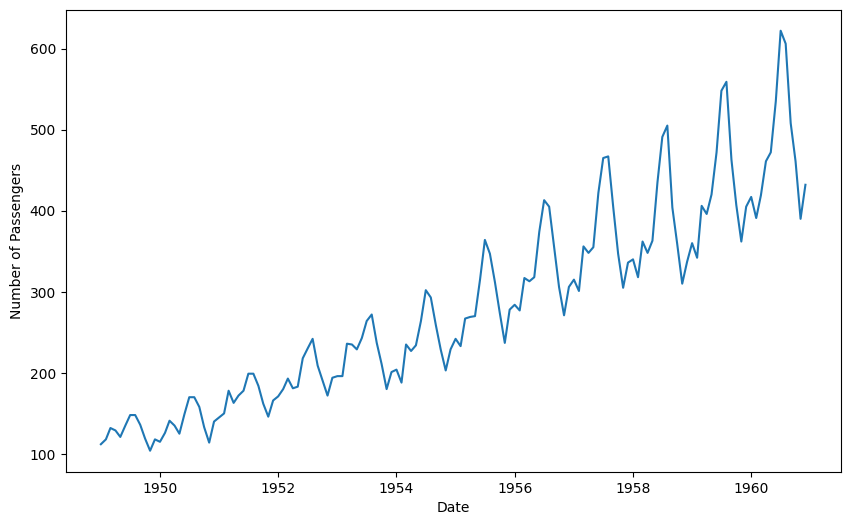

In [14]:
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.plot(indexedData)

In [15]:
rolmean = indexedData.rolling(window = 12).mean()
rolstd = indexedData.rolling(window = 12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


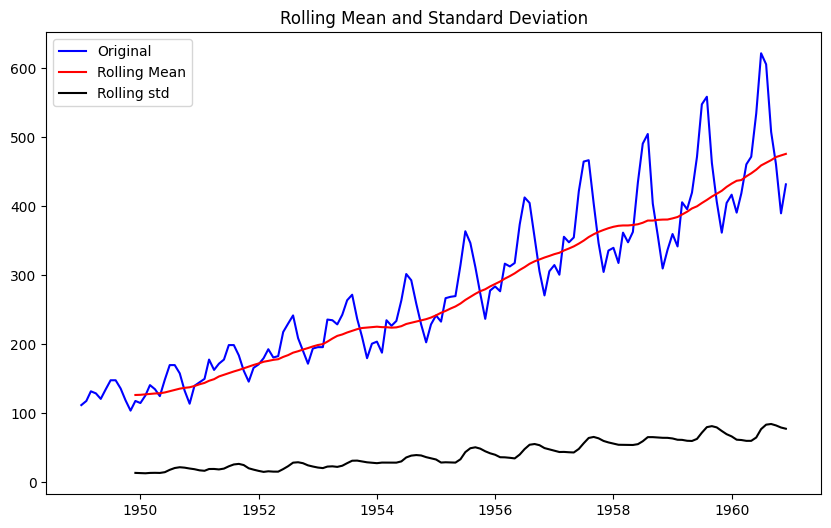

In [17]:
orig = plt.plot(indexedData, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label="Rolling Mean")
std=plt.plot(rolstd, color="black", label="Rolling std")
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(indexedData['#Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


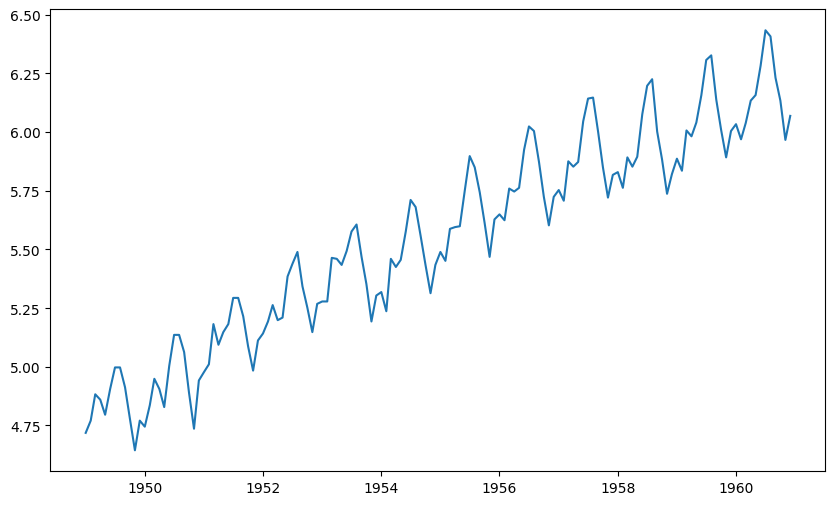

In [19]:
df_log = np.log(indexedData)
plt.plot(df_log)

In [20]:
def get_stationarity(timeseries):
    
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    result = adfuller(timeseries['#Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

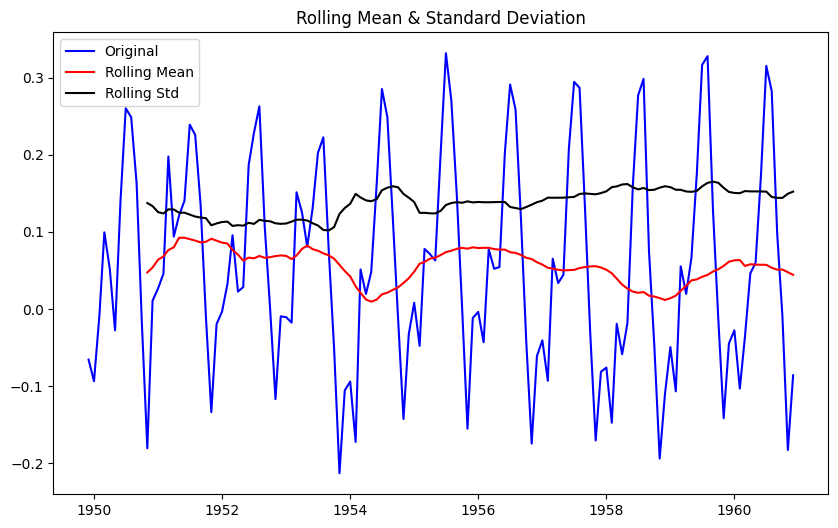

ADF Statistic: -3.1629079913008833
p-value: 0.022234630001242206
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [21]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


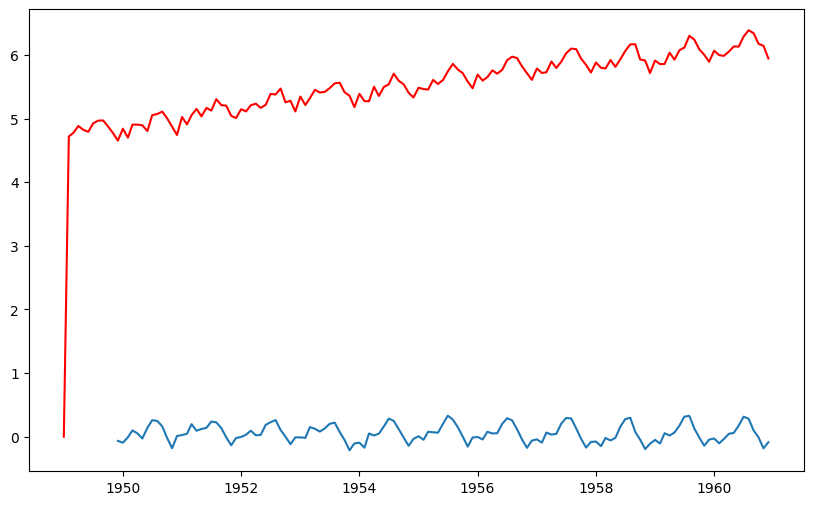

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as smapi

decomposition = seasonal_decompose(df_log) 
model = smapi.tsa.arima.ARIMA(df_log, order=(2,1,2))
results = model.fit()
plt.plot(df_log_minus_mean)
plt.plot(results.fittedvalues, color='red')

<Axes: xlabel='Month'>

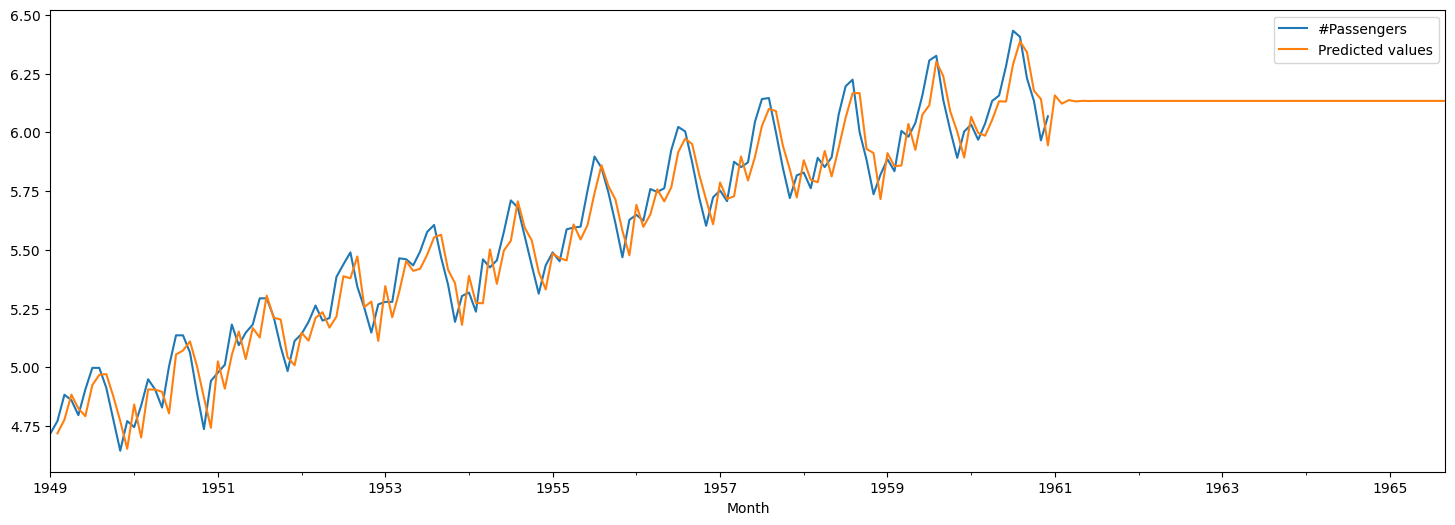

In [23]:
predictions = results.predict(1, 200, typ = 'linear')

df_log.plot(legend = True)
predictions.plot(figsize = (18, 6), legend = True, label = "Predicted values")